# Chapter 1
## Linear Regression

In [95]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [10]:
# Set global variables

# Number of dimensions of input and output space
ndim_x = 1
ndim_y = 1

dataset_size = 100

In [70]:
# Generate underlying distribution

# Uniform random between 0 and 1
theta_true = np.random.random((2, 1)) 

def h_true(_x):
    return theta_true.T @ _x

print("True theta:\n", theta_true)
print(theta_true.shape)
print(theta_true.T)

True theta:
 [[0.42186907]
 [0.77387476]]
(2, 1)
[[0.42186907 0.77387476]]


In [71]:
# Create dataset

data_x = np.random.random((dataset_size, 1))
data_x_aug = np.hstack((np.ones((dataset_size, 1)), data_x))    # Dataset augmented with standard column of ones

data_y = np.apply_along_axis(h_true, 1, data_x_aug)
data_y_noisy = data_y + np.random.normal(0, 0.03, (dataset_size, 1))    # Add some noise to data


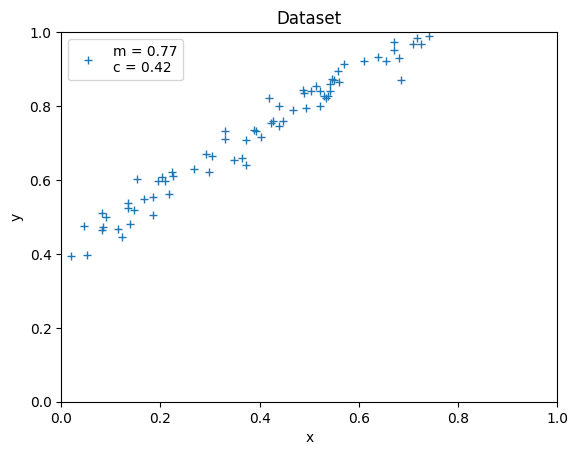

In [72]:
# Plot dataset

fig, ax = plt.subplots()
ax.plot(data_x, data_y_noisy, '+', label=f"m = {theta_true[1].item():.2g}\nc = {theta_true[0].item():.2g}")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Dataset")
ax.legend()
plt.show()


In [73]:
# Define cost function

def h(_theta, _x):
    return _theta.T @ _x

def cost(_theta):
    output = 0
    for i in range(dataset_size):
        output += np.pow( h(_theta, data_x_aug[i]) - data_y_noisy[i] , 2)
    output = 0.5 * output
    return output



In [81]:
# Run Batch Gradient Descent Algorithm

# initialise variables
num_iters = 500
alpha = 0.001
theta = np.array([0, 0])
theta_record = np.zeros((num_iters+1, 2))     # Record of all estimates of theta

theta_record[0] = theta

%time
# Run main loop
for i in range(num_iters):
    temp = 0
    for j in range(dataset_size):
        temp += (data_y_noisy[j] - h(theta.T, data_x_aug[j])) * data_x_aug[j]

    theta = theta + alpha * temp
    theta_record[i+1] = theta

print("Guess: \n", theta)
print("True value: \n", theta_true)

CPU times: user 6 μs, sys: 1e+03 ns, total: 7 μs
Wall time: 11.7 μs
Guess: 
 [0.42836538 0.76865427]
True value: 
 [[0.42186907]
 [0.77387476]]


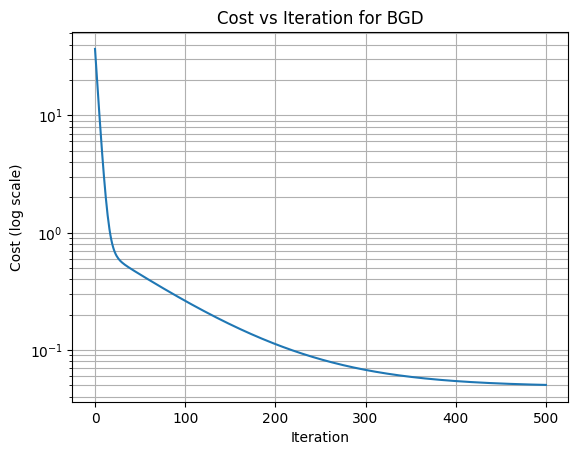

/tmp/ipykernel_909938/1234564618.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = cost(np.array([[x], [y]]))


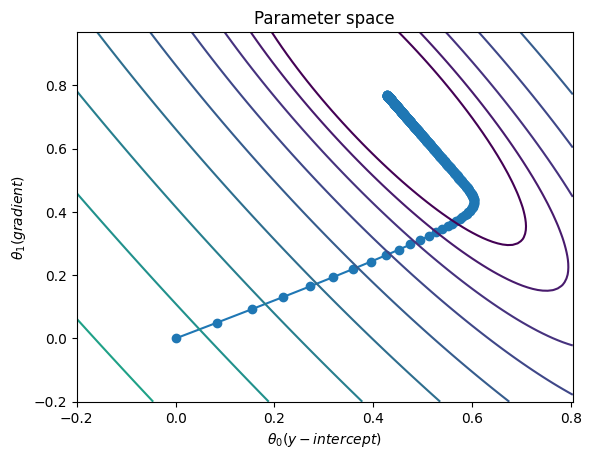

In [103]:
# Plot training process

# Plot of cost against training iteration
cost_record = np.array([cost(t.T) for t in theta_record])

fig, ax = plt.subplots()
ax.plot(np.arange(num_iters+1), cost_record)
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost (log scale)")
ax.set_title("Cost vs Iteration for BGD")
ax.set_yscale('log')
ax.grid(True, which='both')
plt.show()


# Plot of the algorithm traversing parameter space
# and plot contours of cost function across the same space

x_vals = theta_record[:, 0]
y_vals = theta_record[:, 1]

x_range = np.linspace(min(x_vals)-0.2, max(x_vals)+0.2, 100)
y_range = np.linspace(min(y_vals)-0.2, max(y_vals+0.2), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i, j]
        y = Y[i, j]
        Z[i, j] = cost(np.array([[x], [y]]))

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, 'x-')
ax.contour(X, Y, Z, levels=np.logspace(0, 3, num=15), cmap='viridis', norm=LogNorm())
ax.set_xlabel("$\\theta_0 (y-intercept)$")
ax.set_ylabel("$\\theta_1 (gradient)$")
ax.set_title("Parameter space")

plt.show()



In [120]:
# Run Stochastic Gradient Descent Algorithm

# initialise variables
num_iters = 10000
alpha = 0.005
theta = np.array([0, 0])
theta_record = np.zeros((num_iters+1, 2))     # Record of all estimates of theta

theta_record[0] = theta

%time
# Run main loop
# Looping over training data until num_iters total steps have been taken
iter_count = 1
while (iter_count <= num_iters):
    j = iter_count % data_x.shape[0]
    theta = theta + alpha * (data_y_noisy[j] - h(theta.T, data_x_aug[j])) * data_x_aug[j]
    theta_record[iter_count] = theta
    iter_count += 1


print("Guess: \n", theta)
print("True value: \n", theta_true)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.2 μs
Guess: 
 [0.42859289 0.76900836]
True value: 
 [[0.42186907]
 [0.77387476]]


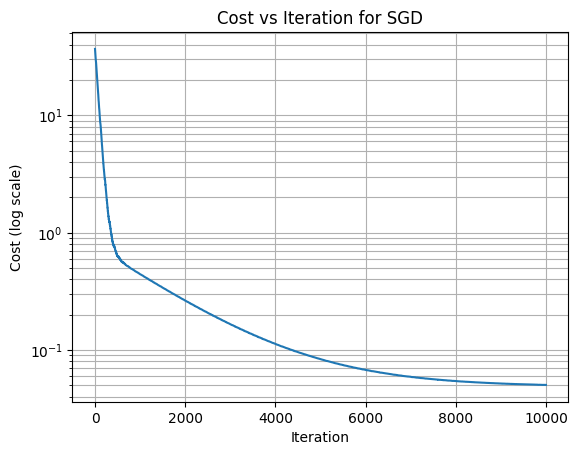

/tmp/ipykernel_909938/3691435104.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = cost(np.array([[x], [y]]))


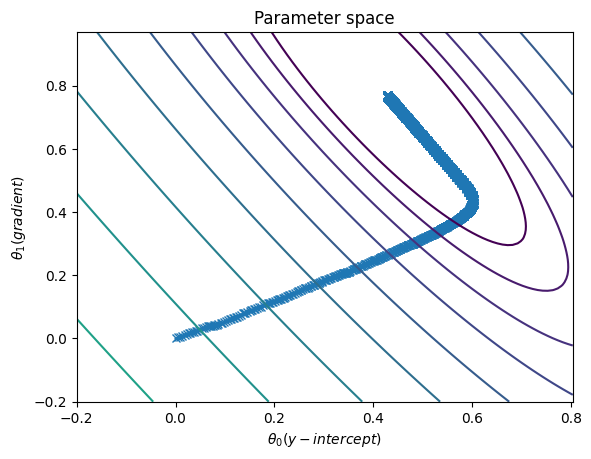

In [121]:
# Plot training process

# Plot of cost against training iteration
cost_record = np.array([cost(t.T) for t in theta_record])

fig, ax = plt.subplots()
ax.plot(np.arange(num_iters+1), cost_record)
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost (log scale)")
ax.set_title("Cost vs Iteration for SGD")
ax.set_yscale('log')
ax.grid(True, which='both')
plt.show()


# Plot of the algorithm traversing parameter space
# and plot contours of cost function across the same space

x_vals = theta_record[:, 0]
y_vals = theta_record[:, 1]

x_range = np.linspace(min(x_vals)-0.2, max(x_vals)+0.2, 100)
y_range = np.linspace(min(y_vals)-0.2, max(y_vals+0.2), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i, j]
        y = Y[i, j]
        Z[i, j] = cost(np.array([[x], [y]]))

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, 'x-')
ax.contour(X, Y, Z, levels=np.logspace(0, 3, num=15), cmap='viridis', norm=LogNorm())
ax.set_xlabel("$\\theta_0 (y-intercept)$")
ax.set_ylabel("$\\theta_1 (gradient)$")
ax.set_title("Parameter space")

plt.show()

